This tutorial is intended to teach you the process of importing data into python using two different methods. Then we will take the data that we have imported and transform it by writing a function. Then this data will be plotted on a graph. 

This will teach the following python skills: packages, file opening and closing, data manipulation, array manipulation, functions and statements, and plotting.

To begin, we need to make sure that the packages which are necessary to run this program are installed. To do this, we will use a loop statement. A loop statement is a way to go through a list of items in a program. It starts at the first item and iterates through each item until it reaches the end. Then the loop automatically ends and if there is more to the program, then the next part of the program is run in sequence. NOTE: Computers take programming literally. They will do everything in the order in which you have it written, so make sure to have it set in the correct order, or things will go wrong!

To begin, we need a list of the packages which we need for this program. 


In [18]:
#Make a list of the packages which we need to import into the program
packages = ['xarray', 'numpy','matplotlib','netCDF4','cartopy.crs','metpy']

#A for loop. It loops through the list of packages, taking each entry one by one and setting the variable package to
#that value. So on the first pass through, package = 'xarray', then package = 'numpy'.....until package='metpy'.
#Once it runs for package = 'metpy', then the loop ends
import importlib

for package in packages:
    spam_spec = importlib.util.find_spec(package)
    found = spam_spec is not None
    if found == True:
     print('Package is installed')
    else:
     print('Need to install: ' + package + '!')   



Package is installed
Package is installed
Package is installed
Package is installed
Package is installed
Package is installed


If any of the above packages are not installed, you will need to go and install them before we can continue! Open your anaconda prompt and make sure you are in your correct environment! (So in our case we need to type: conda activate test). Then go to anaconda.org. In the search bar, type in the name of the package you need and search for it. Click on the first one you see and it will tell you a command to install it (usually conda -c install something). If you cannot find a package, then in the anaconda prompt, type (pip install packagename). That should install what is needed.

Once we have all the packages installed, we will continue on to the next step of the program!

In [42]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
import metpy
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from matplotlib.cm import get_cmap


When importing packages, we can either import all the modules at once by saying import packagename
Sometimes there are many modules in a package, that it is easier to import specific ones.
Such as above with matplotlib. There are many modules in matplotlib, but we want the pyplot module.
So we say from packagename import module. Then we can rename the module to whatever variable we want 
In our case, we rename pyplot as plt since it's easier in our script to type out plt than pyplot!

Next we are going to open our Dataset. We will do this using the netCDF4 Dataset module. 
First go to this website: https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.surface.html
and download the first file, air.mon.mean.nc

In [22]:
#Import the netcdf file and save it to the ncfile variable. Make sure to change the path to where it is
#located on your computer!
ncfile = Dataset("/home/mariofire/Downloads/air.mon.mean.nc")

print(ncfile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    References: http://www.esrl.noaa.gov/psd/dat

So if we look at the output above we see that the sizes of each dimension are 73 latitudes, 144 longitudes and 860 time-steps. The time steps each represent one month per step from 1948-present day.

Then under variables we see what variables are within the file. In this case we have:
    lat, lon, time, and air.
    Each variable shows how large it is based on the dimensions. So lat is a list of 73 latitudes. 
In this case, we care about the variable "air" which contains the air temperature. This data
is saved as an array with dimensions (time,lat,lon), so the array is (860,73,144). 

Now we want to get the air data into it's own variable so we can work with it. To do this, we 
need to extract the variable from the netcdf file we imported. To do this,
we will choose the variable using its name in a string, so for our example,
we choose 'air'. Then we tell the ncfile we want that variable using brackets.

In [81]:
temp_data = ncfile.variables['air'][:,:,:]
print(ncfile['air'])

<class 'netCDF4._netCDF4.Variable'>
float32 air(time, lat, lon)
    long_name: Monthly Mean Air Temperature at sigma level 0.995
    valid_range: [-2000.  2000.]
    units: degC
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: -9.96921e+36
    precision: 1
    least_significant_digit: 0
    var_desc: Air Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Obs
    dataset: NCEP Reanalysis Derived Products
    actual_range: [-73.78001  42.14595]
unlimited dimensions: time
current shape = (860, 73, 144)
filling on, default _FillValue of 9.969209968386869e+36 used



Now we see the units of the data: degC. For our purposes that is good, but let's say we are making a figure for the general public here in the U.S. We want to convert the temperature from degC to degF. Let's make a function to do this!

Functions operate to make programs cleaner. By writing a function, we can have it perform the steps we need to be done by calling it from within the script, rather than writing a bunch of code in the script. For example:

def add_two_numbers(num1,num2):
        sum = num1 + num2
        return sum

summation = add_two_numbers(4,5)
print(sum)

This will find the sum of any two numbers when the function add_two_numbers is called. The function returns the value of sum. This value is saved to our variable summation. If we didnt say summation= add_two_numbers(4,5), then the function would still return sum, but it would not get saved to any variable. The variable "sum" only exists within the function, so once the function has run, it is removed from memory and cannot be accessed. This is why we save the value to a new variable outside the function, so we can use it!

Now you try: write a function that takes a celsius temperature as input and treturns the temperature in fahrenheit!

In [82]:
def convert_to_fahrenheit(temp):
 
    
    return degf

We want to take the array of temperatures and convert each one to fahrenheit. There are easier ways to do this, but for learning purposes we will do the longer method first! So we will use your convert_to_fahrenheit function above to accomplish this! We will use a series of for loops to accomplish this. First we need to get the shape of the array, to do this, we use the shape function.

In [83]:
shape = temp_data.shape
print(shape)
print(shape[0])

(860, 73, 144)
860


Shape is now an array that has 3 values, 1 for each dimension in the temp_data array. We can access each value using shape[0], shape[1], shape[2]. The index number represents the number of the value. We use indices to access specific values in an array. Say we wanted a specific temperature at a specific point during a specific month, we could say:
    temp_data[4,5,8]. That will return a single value. 
    
If we wanted data for a specific point over all months, we could say:
    temp_data[:,5,8]. That will return a list of values for each month at that point.
    The ":" operator in an index tells the program to grab all values in that position in the array. So in the above case, we told it to grab all values in the first dimension (time) for one lat and one lon. 
Remember, python starts with 0 for its indices, so the first value of the array is at temp_array[0,0,0]! 

Now that we have the shape of the array, we will iterate through it to get each value for each point [0,0,0],[0,0,1] etc and convert it to degf!

For this loop, we will be using the range function. This tells the program to start the variable at 0 and run the loop adding one each time until we reach the last value. For example: The below program takes a variable, "i", and takes it from 0 to 10 adding one each time and prints the value so you can see.

In [84]:
for i in range(10):
        print(i)

0
1
2
3
4
5
6
7
8
9


Now we will loop through our 3 dimensional array at one time at each point to get the temperature and convert it. So pick any time you would like from 0-859. Each time represents a new month so pick a value for any month and put it into the temp_date[0,:,:] for the 0 value.

In [85]:
temp_data = temp_data[0,:,:]
for j in range(shape[1]):
    for k in range(shape[2]):
        #value is set to the value of the array_temp at the point i,j,k
        value = temp_data[j,k] 
        #Now send the value to the function to convert it and set the value to the variable "returned"
        returned = convert_to_fahrenheit(value)
        #Now we need to set the temp_data at that point to the new value
        temp_data[j,k] = returned
        
            

print(temp_data)

[[-30.86819    -30.86819    -30.86819    ... -30.86819    -30.86819
  -30.86819   ]
 [-31.250832   -31.233412   -31.229353   ... -31.33967    -31.306004
  -31.26883   ]
 [-29.834633   -29.276066   -28.783672   ... -31.60096    -31.005226
  -30.408318  ]
 ...
 [  2.2547193    2.4718845    2.6873024  ...   1.7687218    1.8720757
    2.0416222 ]
 [  2.857436     2.8359542    2.8098137  ...   2.9613667    2.9085293
    2.878921  ]
 [  0.14408073   0.14408073   0.14408073 ...   0.14408073   0.14408073
    0.14408073]]


Now we have converted all of our temperatures in the array to fahrenheit! Now let's plot a day's worth of temperature data to see what it looks like! For this we will use matplotlib and cartopy. Cartopy allows us to set a projection for the data, in this case, we will use PlateCarree() which is the standard projection. If we were plotting GFS data, we would instead use lambert conformal conic to plot the data. If you use the wrong projection, the data will not display properly and will not make sense!

Text(0.5, 1.0, 'My First Temperature Graph')

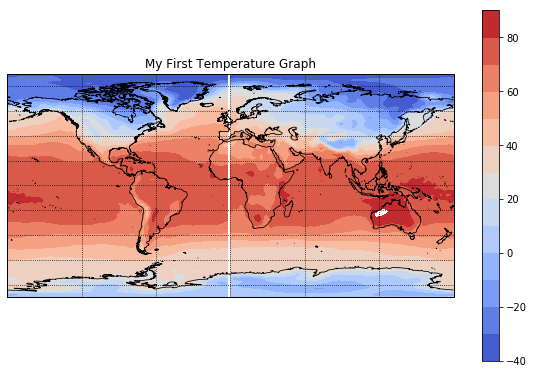

In [87]:
#Tell the program that we want to plot a figure and specify the size. Size doesn't matter....giggity
fig = plt.figure(figsize=(10,7.5))
#We want to plot on a specific axis, so we call it geo_axes
geo_axes = plt.axes(projection=ccrs.PlateCarree())
#We want to add in the coastlines and gridlines
geo_axes.coastlines('50m',linewidth=0.8)
geo_axes.gridlines(color="black", linestyle="dotted")
#We need the lats, lons to be 2d arrays so we will get them and combine them using meshgrid.
lat = ncfile.variables['lat'][:]
lon = ncfile.variables['lon'][:]
levels = np.arange(-40,100,10)
#lats,lons = np.meshgrid(lon,lat)
#We need to plot each month separately for our temp_data array, we picked the month earlier, so it will plot that one
plt.contourf(lon, lat, np.squeeze(temp_data[:,:]),levels,cmap=get_cmap('coolwarm'),transform=ccrs.PlateCarree())
plt.colorbar(ax=geo_axes, shrink=.86)
plt.title('My First Temperature Graph')



Now we have made a temperature graph for your given month! Congratulations!

Now we will do it the easy way and you will all hate me for this!

This time, we will use xarrays. Xarrays are a faster type of array that is much more useful for data analysis in python. We will be using these especialy in the coming weeks when we begin to work with the Pandas python package.

In [65]:
#The location of the data file on our computer
dataDIR = '/home/mariofire/Downloads/air.mon.mean.nc'
#We tell the program to open this dataset
DS = xr.open_dataset(dataDIR)
DS


<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 860)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-08-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

We see the data is saved to an xarray.Dataset above called DS. We have the same three dimensions and one variable.
Now we can select the variable using DS.air

With xarrays, we only need to put the name of the variable after the name of the array to get it.

In [67]:
da = DS.air
da

<xarray.DataArray 'air' (time: 860, lat: 73, lon: 144)>
[9040320 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-08-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

Now da contains the value of the air variable from the array. If we look above at the output and look at the Coordinates, we see the time is in datetime64. This means that each month is saved as 1948-01-01, 1948-02-01, etc. This means we can access specific dates now without having to figure out the exact index!

In [73]:
temp = da.sel(time='1948-01-01')
temp

array([[-34.926773, -34.926773, -34.926773, ..., -34.926773, -34.926773,
        -34.926773],
       [-35.13935 , -35.129673, -35.12742 , ..., -35.188705, -35.170002,
        -35.14935 ],
       [-34.352573, -34.04226 , -33.768707, ..., -35.333866, -35.002903,
        -34.671288],
       ...,
       [-16.525156, -16.404509, -16.284832, ..., -16.795155, -16.737736,
        -16.643543],
       [-16.190313, -16.202248, -16.21677 , ..., -16.132574, -16.161928,
        -16.178377],
       [-17.697733, -17.697733, -17.697733, ..., -17.697733, -17.697733,
        -17.697733]], dtype=float32)

We can also select slices of data, using the slice() function. So we can say temp = da.sel(time=slice('date1','date2')). This will output an array with dimensions (time, lat, lon) where time is the number of months that are between each of the dates. This helps if we want to average data over a time period, etc.

Now we can plot using the xarray itself!

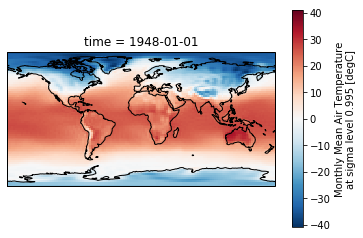

In [74]:
#First we need to declare the projection, again using PlateCarree()
ax = plt.axes(projection=ccrs.PlateCarree())
#now we plot the temperature data in our array
temp.plot()
ax.coastlines()
plt.show()